# M.TECH
# Тестовое задание

Руководство компании обратило внимание на то, что сотрудники старше 35 лет болеют чаще, чем более молодые сотрудники. Кроме этого, среди мужчин количество пропусков рабочих дней в связи с больничным выше, чем среди женщин. В связи с этой ситуацией, руководство организации планирует ввести дополнительные медицинские осмотры среди групп риска.

Необходимо проверить следующие гипотезы:
1) Мужчины пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще женщин.
2) Работники старше 35 лет (age) пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще своих более молодых коллег.

Все необходимые данные содержатся в файле «М.Тех_Данные_к_ТЗ_DS.csv».

##  <a name="1">Шаг 1. Импортируем бибилотеки и вводим функции</a>

**Импортируем библиотеки**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st


In [2]:
# игнорирование предупреждений
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

**Написанные для проекта функции**

In [3]:
def all_info(data, name_data: str):
    print(
        "-----------------------",
        "\033[1m" + name_data + "\033[0m",
        "-----------------------",
    )
    print("")

    print("")
    print("\033[1m" + "1) Вывод первых 5 строк датафрейма" + "\033[0m")
    display(data.head())
    print()
    print("\033[1m" + "2) Размер выборки." + "\033[0m")
    print("")
    print(data.shape)
    print("")
    print("\033[1m" + "3) Выведим основную информацию о датафрейме." + "\033[0m")
    print("")
    display(data.info())

    print("")
    print("Посмотрим на уникальные значения в столбцах базы данных.")
    print("")
    for j in data.columns:
        print("Кол-во уникальных значений в столбце", j, ":", data[j].nunique())
        print(pd.Series(data[j]).sort_values().unique())
        print("")

    a = []
    b = []
    c = []
    count = 0
    for value in data.columns:
        a.append(data[value].isna().sum())
        b.append((data[value].isna().sum() / len(data)) * 100)
        c.append(value)
        count += 1

    f = pd.DataFrame(
        {"name_columns": pd.Series(c), "count": pd.Series(a), "count,%": pd.Series(b)}
    )
    print("")
    print("\033[1m" + "4) Таблица пропусков по столбцам." + "\033[0m")
    print("")
    display(f.sort_values(by=["count"], ascending=False))
    print("")
    print("Колв-во столбцов с пропусками:", len(f[f["count"] > 0]))
    print("")

    print("\033[1m" + "5) Построение матрицы пропущенных значений" + "\033[0m")
    colours = ["#993366", "#FFFF00"]
    sns.heatmap(data.isnull(), cmap=sns.color_palette(colours))

    plt.title("Матрица пропущенных значений набора данных", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    print("\033[1m" + "6) Кол-во уникальных дупликатов." + "\033[0m")
    print("")
    print("Уникальных дупликатов:", data.duplicated().sum())
    print("")
    print("")
    print("\033[1m" + "7) Выведим общую информацию о данных в столбцах." + "\033[0m")
    print("")
    display(data.describe())
    print("")


In [4]:
def info_polt(data,value):
    print()
    sns.set()
    fig,axes = plt.subplots(nrows=2, ncols=1, figsize = (15,8))
    axes[0].hist(data[value],bins = 100)
    axes[0].set_title(f'Гистограмма для столбца {value}');
    axes[0].set_ylabel('Кол-во')

    sns.boxplot(x=data[value],
                ax=axes[1]);
    axes[1].set_title(f'График "ящика с усами" для столбца {value}');
    print()

##  <a name="2">Шаг 2. Откроем файл с данными и изучим общую информацию</a>

**Считаем данные из csv-файла в датафрейм и сохраним в переменную data. Путь к файлу:**
`/М.Тех_Данные_к_ТЗ_DS.csv`

In [5]:
try:
    df = pd.read_csv('../data/М.Тех_Данные_к_ТЗ_DS.csv', encoding='cp1251', sep =',')
    # cp1251 это Windows-1251 - русская кодировкая
except:
    print(
        "Файл не найден. Проверьте путь до файла или само наличие файла на компьютере"
    )

**Выводим первые 10 строчек датафрейма data на экран**

In [6]:
df.head()

,"Количество больничных дней,""Возраст"",""Пол"""
0,"5,39,""Ж"""
1,"4,54,""М"""
2,"4,26,""М"""
3,"5,42,""М"""
4,"4,29,""М"""


**Выведим основную информацию о датафрейме.**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 1 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Количество больничных дней,"Возраст","Пол"  237 non-null    object
dtypes: object(1)
memory usage: 2.0+ KB


**Разбиение даных по столбцам**

Получим список названий столбцов

In [8]:
list_columns = [
    df.columns.str.split(",")[0][i].replace('"', "")
    for i in range(len(df.columns.str.split(",")[0]))
]

In [9]:
df.columns[0]

'Количество больничных дней,"Возраст","Пол"'

Разбиваем данные по столбцам

In [10]:
df[list_columns] = df[df.columns[0]].str.split(',' , expand= True )

In [11]:
df.head()

,"Количество больничных дней,""Возраст"",""Пол""",Количество больничных дней,Возраст,Пол
0,"5,39,""Ж""",5,39,"""Ж"""
1,"4,54,""М""",4,54,"""М"""
2,"4,26,""М""",4,26,"""М"""
3,"5,42,""М""",5,42,"""М"""
4,"4,29,""М""",4,29,"""М"""


Удалим ненужный столбец 'Количество больничных дней,"Возраст","Пол"'

In [12]:
df = df.drop(['Количество больничных дней,"Возраст","Пол"'], axis=1)

In [13]:
df.head()

,Количество больничных дней,Возраст,Пол
0,5,39,"""Ж"""
1,4,54,"""М"""
2,4,26,"""М"""
3,5,42,"""М"""
4,4,29,"""М"""


В столбцe 'Пол' избавимся от кавычек

In [14]:
df['Пол'] = [
    df.loc[i,'Пол'].replace('"', "")
    for i in range(len(df))
]
df.head()

,Количество больничных дней,Возраст,Пол
0,5,39,Ж
1,4,54,М
2,4,26,М
3,5,42,М
4,4,29,М


**Выведим общую информацию о представленных данных**

----------------------- Данные о больничных днях сотрудников -----------------------


1) Вывод первых 5 строк датафрейма


,Количество больничных дней,Возраст,Пол
0,5,39,Ж
1,4,54,М
2,4,26,М
3,5,42,М
4,4,29,М



2) Размер выборки.

(237, 3)

3) Выведим основную информацию о датафрейме.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Количество больничных дней  237 non-null    object
 1   Возраст                     237 non-null    object
 2   Пол                         237 non-null    object
dtypes: object(3)
memory usage: 5.7+ KB


None


Посмотрим на уникальные значения в столбцах базы данных.

Кол-во уникальных значений в столбце Количество больничных дней : 9
['0' '1' '2' '3' '4' '5' '6' '7' '8']

Кол-во уникальных значений в столбце Возраст : 35
['23' '24' '25' '26' '27' '28' '29' '30' '31' '32' '33' '34' '35' '36'
 '37' '38' '39' '40' '41' '42' '43' '44' '45' '46' '47' '48' '49' '50'
 '51' '52' '53' '54' '55' '57' '60']

Кол-во уникальных значений в столбце Пол : 2
['Ж' 'М']


4) Таблица пропусков по столбцам.



,name_columns,count,"count,%"
0,Количество больничных дней,0,0.0
1,Возраст,0,0.0
2,Пол,0,0.0



Колв-во столбцов с пропусками: 0

5) Построение матрицы пропущенных значений


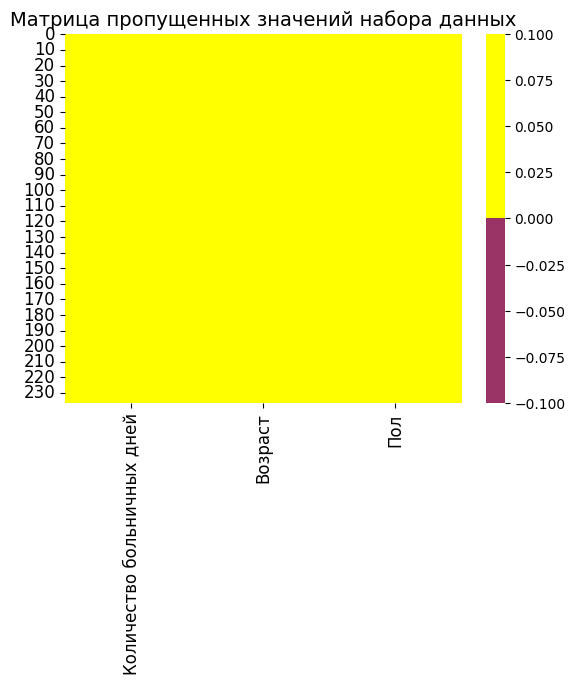

6) Кол-во уникальных дупликатов.

Уникальных дупликатов: 72


7) Выведим общую информацию о данных в столбцах.



,Количество больничных дней,Возраст,Пол
count,237,237,237
unique,9,35,2
top,3,41,М
freq,54,20,139


In [15]:
all_info(df,'Данные о больничных днях сотрудников')

Предварительная информация:
- данные имеют 237 строк и 3 столбца
- Типы данных в столбцах "Количество больничных дней" и "Возраст" необходимо перевести в целочисленный тип данных
- пропуски отсуствуют
- Максимальное кол-во дней, которые болел сотруник - 8, а минимальное - 0
- Возраст сотрудников в диапазоне от 23 до 60 лет включительно

**Корректировка типа данных**

In [16]:
df['Количество больничных дней'] = df['Количество больничных дней'].astype('int')
df['Возраст'] = df['Возраст'].astype('int')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Количество больничных дней  237 non-null    int64 
 1   Возраст                     237 non-null    int64 
 2   Пол                         237 non-null    object
dtypes: int64(2), object(1)
memory usage: 5.7+ KB


##  <a name="3">Шаг 3. Анализ данных</a>

**Рассмотрим распределение данных по столбцам**

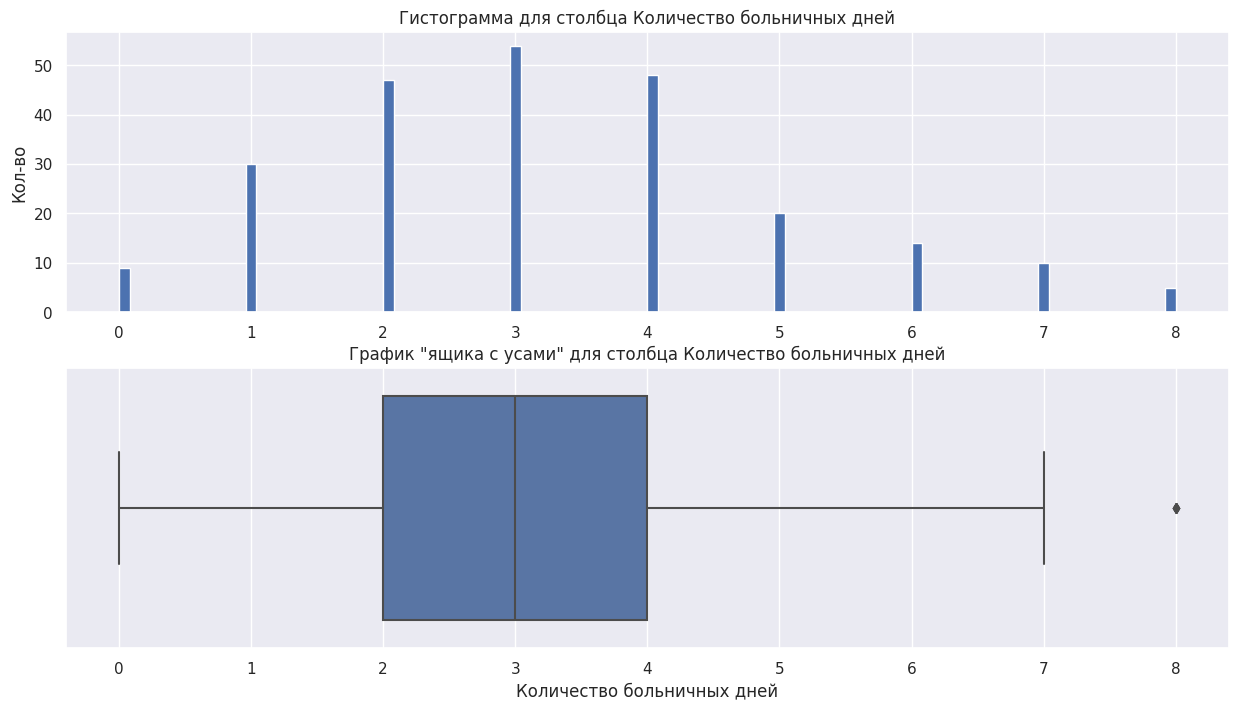

In [18]:
info_polt(df,'Количество больничных дней')

Можно наблюдать, что данные стремятся к нормальному распределнию. Однако присуствует небольшое смещение среднего

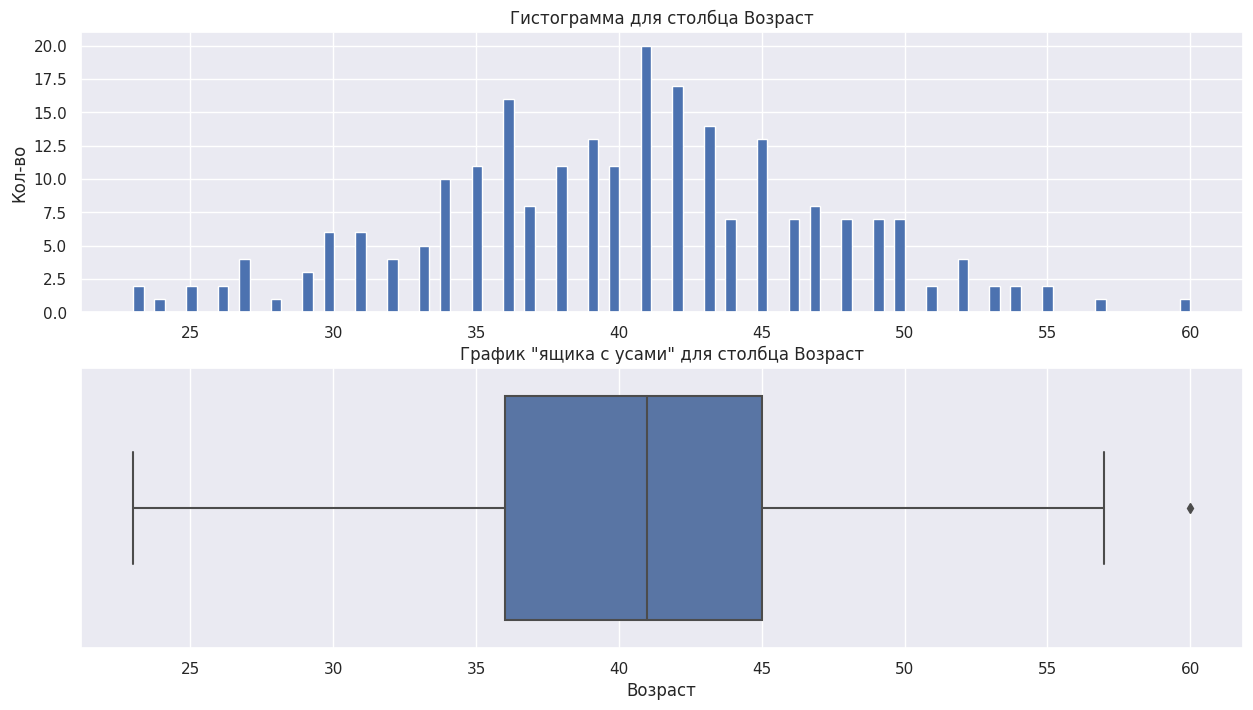

In [19]:
info_polt(df,'Возраст')

По возрастам данные тоже стремятся к нормальному распределению. ТАкже присуствует незначительное смещение

In [20]:
df[['Количество больничных дней','Возраст']].describe()

,Количество больничных дней,Возраст
count,237.000000,237.000000
mean,3.257384,40.181435
std,1.807821,6.875157
min,0.000000,23.000000
25%,2.000000,36.000000
50%,3.000000,41.000000
75%,4.000000,45.000000
max,8.000000,60.000000


Округлив до целого в среднем люди болеют 3 дня и средний возраст 40 лет

,Пол,count,"count,%"
0,М,139,58.649789
1,Ж,98,41.350211


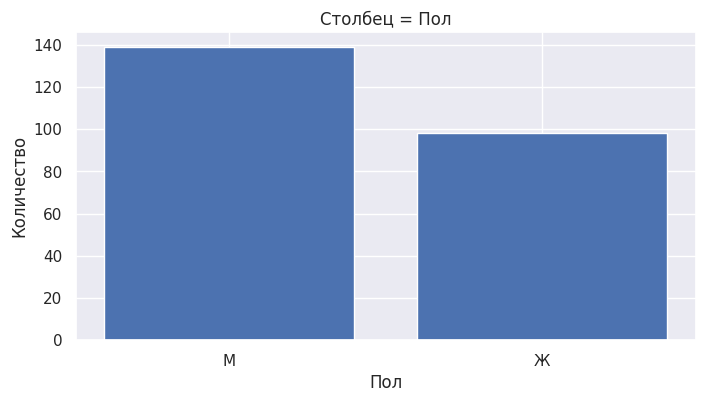

In [21]:
group_gender = pd.DataFrame(df['Пол'].value_counts().reset_index())
group_gender['count,%'] = group_gender['count']/len(df) * 100
display(group_gender)
print('')
plt.figure(figsize=(8,4))
plt.title('Столбец = Пол')
plt.bar(group_gender[f'{group_gender.columns[0]}'],group_gender[f'{group_gender.columns[1]}']);
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show();

Мужчин представлено чуть больше, чем женщин. В соотношение 60:40

**Распределение кол-ва пропущенных дней по возрасту**

In [22]:
stats_df = (
    df.pivot_table(
        index=["Пол", "Возраст"],
        values=["Количество больничных дней"],
        aggfunc=["count", "sum", "mean", "std", "median"],
    )
    .round(2)
    .reset_index()
)

stats_df.columns = [
    "gender",
    "age",
    "work_days_count",
    "work_days_sum",
    "work_days_mean",
    "work_days_std",
    "work_days_median",
]

stats_df.head(10)


,gender,age,work_days_count,work_days_sum,work_days_mean,work_days_std,work_days_median
0,Ж,23,1,6,6.00,NaN,6.0
1,Ж,24,1,1,1.00,NaN,1.0
2,Ж,25,2,5,2.50,2.12,2.5
3,Ж,26,1,4,4.00,NaN,4.0
4,Ж,30,3,10,3.33,1.15,4.0
5,Ж,31,2,6,3.00,1.41,3.0
6,Ж,32,2,5,2.50,2.12,2.5
7,Ж,33,2,7,3.50,0.71,3.5
8,Ж,34,3,7,2.33,1.15,3.0
9,Ж,35,2,10,5.00,1.41,5.0


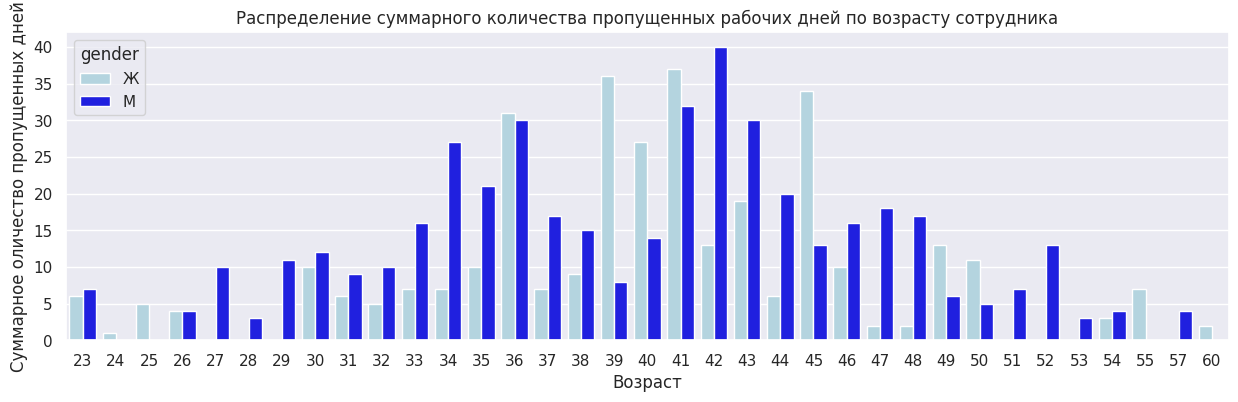

In [23]:
sns.set(rc={"figure.figsize":(15, 4)}) 
ax = sns.barplot(x='age',
            y='work_days_sum',
            hue="gender",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Распределение суммарного количества пропущенных рабочих дней по возрасту сотрудника')
ax.set(xlabel='Возраст', ylabel='Суммарное оличество пропущенных дней');

- По мужчинам можно заметить, что больше всего пропускало отрудников в дипазаоне 34-36 лет и 41-43
- По женщинам: больше всего пропускало отрудников в дипазаоне 36 лет и 39-43 и 45

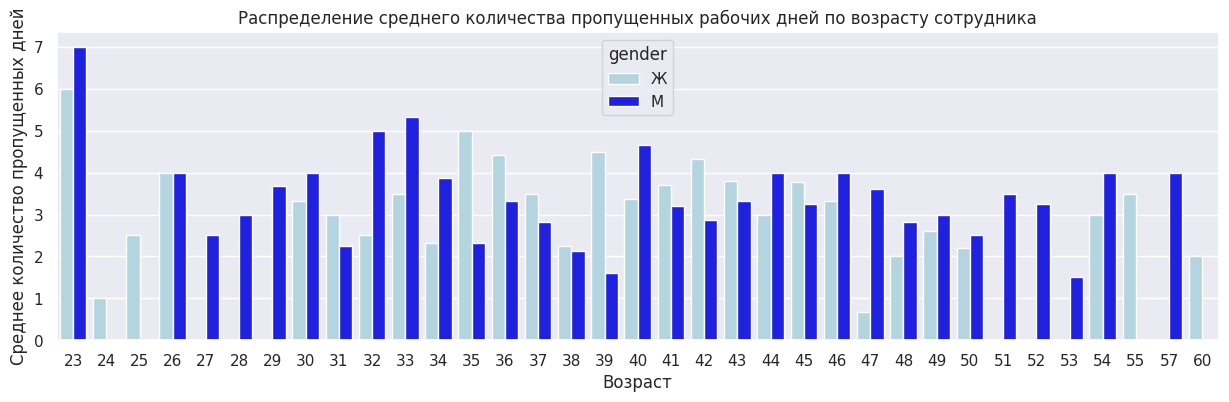

In [24]:
sns.set(rc={"figure.figsize":(15, 4)}) 
ax = sns.barplot(x='age',
            y='work_days_mean',
            hue="gender",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Распределение среднего количества пропущенных рабочих дней по возрасту сотрудника')
ax.set(xlabel='Возраст', ylabel='Среднее количество пропущенных дней');

Наблюдается сильный всплеск среднего кол-ва пропущенных дней в возрасте 23. Это сотрудники, которых мало и болели самое большое кол-во дней. Поэтому они так резко выбились из среднего в нашем распределении.

**Распределение кол-ва сотрудников по возрасту**

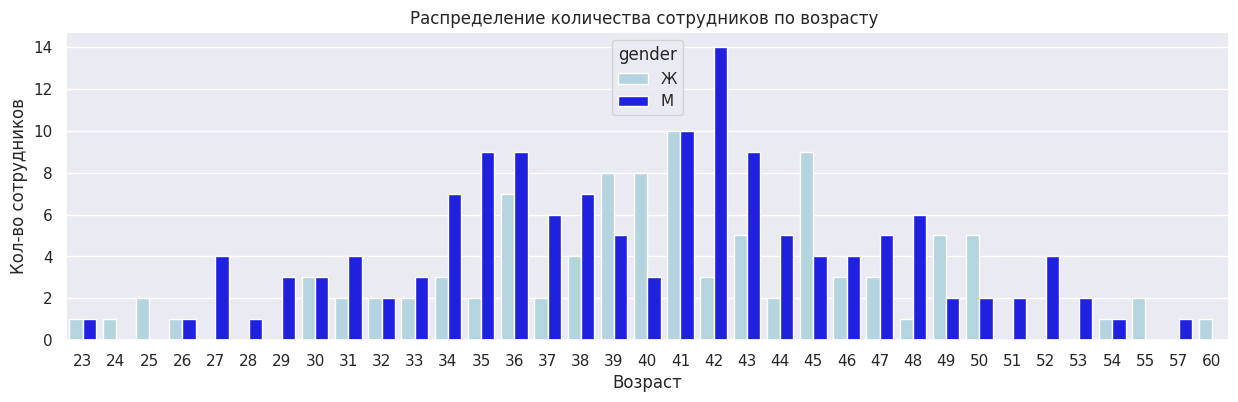

In [25]:
sns.set(rc={"figure.figsize":(15, 4)}) 
ax = sns.barplot(x='age',
            y='work_days_count',
            hue="gender",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Распределение количества сотрудников по возрасту ')
ax.set(xlabel='Возраст', ylabel='Кол-во сотрудников');

Мужчины:
- Наибольшее кол-во наблюдается в возрасте 34-38 лет и 41-43

Женщины:
- Наибольшее кол-во наблюдается в возрасте 36 лет, 39-40, 45

**Распределение кол-ва сотрудников по кол-ву пропущенных дней**

In [26]:
stats_df_2 = (
    df.pivot_table(
        index=["Количество больничных дней", "Пол"],
        values=["Количество больничных дней"],
        aggfunc=["count"],
    )
    .round(2)
    .reset_index()
)

stats_df_2.columns = [
    "work_days",
    "gender",
    "work_days_count"
]

stats_df_2.head(10)

,work_days,gender,work_days_count
0,0,Ж,1
1,0,М,8
2,1,Ж,14
3,1,М,16
4,2,Ж,16
5,2,М,31
6,3,Ж,23
7,3,М,31
8,4,Ж,23
9,4,М,25


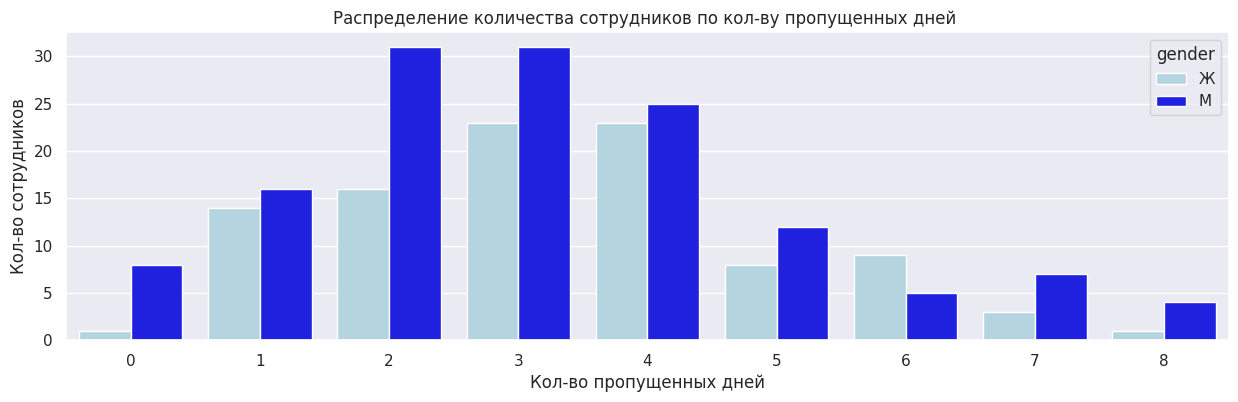

In [27]:
sns.set(rc={"figure.figsize":(15, 4)}) 
ax = sns.barplot(x='work_days',
            y='work_days_count',
            hue="gender",
            data=stats_df_2,
            palette=['lightblue', 'blue'])

ax.set_title('Распределение количества сотрудников по кол-ву пропущенных дней ')
ax.set(xlabel='Кол-во пропущенных дней', ylabel='Кол-во сотрудников');

Данные распределены нормально. По графику кол-во мужчин болеющих в течении года по всем рассматриваемым пропущенным дням практически везде больше, чем женщин. Однако не забываем, что у нас баланс мужчин и женщин в выборке смещен чуть больше в сторону мужчин.

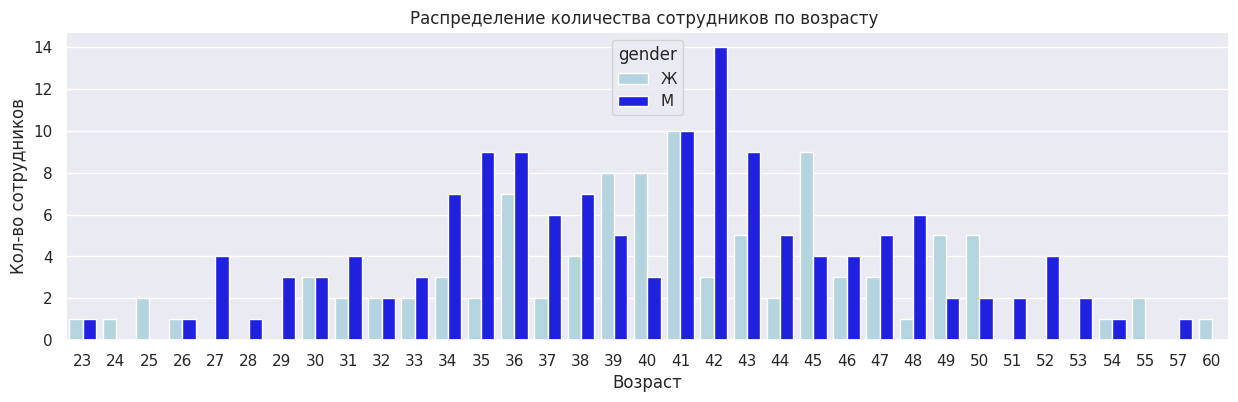

In [28]:
sns.set(rc={"figure.figsize":(15, 4)}) 
ax = sns.barplot(x='age',
            y='work_days_count',
            hue="gender",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Распределение количества сотрудников по возрасту ')
ax.set(xlabel='Возраст', ylabel='Кол-во сотрудников');

Мужчины:
- больше всего  представленно в возрасте 34-36 и 41-43

Женщины:
- больше всего  представленно в возрасте 39-41,45

##  <a name="4">Шаг 4. Проверка гипотез</a>

**Задание 1** Проверка гипотезы: Мужчины пропускают в течение года более 2 рабочих дней (work_days_1) по болезни значимо чаще женщин.

Для Вывявления кто чаще пропускал надо посчитать кол-во пропущенных дней (не сумму) сотрудниками мужчинами. Для нахождения частоты нам достаточно посчиать только кол-во сотрудников. Примером может служить гистограмма по кол-ву пропущенных сотрудниками дней. 


Сгруппируем данные. Посчитаем кол-во сорудникво пропустивших определенное кол-во рабоичх дней в зависимости от пола. Но перед этим отфильтруем исходный набор данных, где оставим сотрудников с кол-во пропусков более 2 дней. 

In [29]:
work_days_1 = 2

In [30]:
df_work_days_1 = df[df['Количество больничных дней'] > work_days_1].reset_index(drop=True)

In [31]:
st_gender = (
    df_work_days_1.pivot_table(
        index=["Пол", "Количество больничных дней"],
        values=["Количество больничных дней"],
        aggfunc=["count"],
    )
    .round(2)
    .reset_index()
)

st_gender.columns = [
    "gender",
    "work_days",
    "work_days_count"
]

In [32]:
st_gender

,gender,work_days,work_days_count
0,Ж,3,23
1,Ж,4,23
2,Ж,5,8
3,Ж,6,9
4,Ж,7,3
5,Ж,8,1
6,М,3,31
7,М,4,25
8,М,5,12
9,М,6,5


Посмотрим на баланс мужчин и женщин в нашей выборке

In [33]:
df_work_days_1.groupby('Пол').count().reset_index(col_level=True)

,Пол,Количество больничных дней,Возраст
0,Ж,67,67
1,М,84,84


Вычислим относительную частоту пропусков сотрудниками мужчинами и женщинами в каждой своей выборке. Посмотрим таким образом какое соотношение у данных.

In [34]:
st_gender.loc[
    st_gender["gender"] == "Ж", "frequency"
] = (
    st_gender.loc[
        st_gender["gender"] == "Ж", "work_days_count"
    ]
    / st_gender[st_gender["gender"] == "Ж"]["work_days_count"].sum()
).round(
    4
)


In [35]:
st_gender.loc[
    st_gender["gender"] == "М", "frequency"
] = (
    st_gender.loc[
        st_gender["gender"] == "М", "work_days_count"
    ]
    / st_gender[st_gender["gender"] == "М"]["work_days_count"].sum()
).round(
    4
)

In [36]:
st_gender

,gender,work_days,work_days_count,frequency
0,Ж,3,23,0.3433
1,Ж,4,23,0.3433
2,Ж,5,8,0.1194
3,Ж,6,9,0.1343
4,Ж,7,3,0.0448
5,Ж,8,1,0.0149
6,М,3,31,0.3690
7,М,4,25,0.2976
8,М,5,12,0.1429
9,М,6,5,0.0595


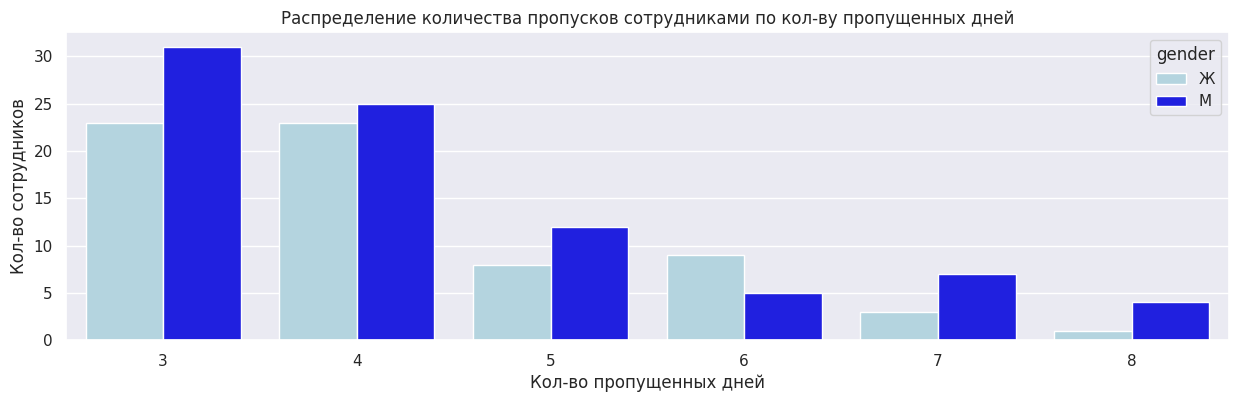

In [37]:
ax = sns.barplot(x='work_days',
            y='work_days_count',
            hue="gender",
            data=st_gender,
            palette=['lightblue', 'blue'])

ax.set_title('Распределение количества пропусков сотрудниками по кол-ву пропущенных дней')
ax.set(xlabel='Кол-во пропущенных дней', ylabel='Кол-во сотрудников');

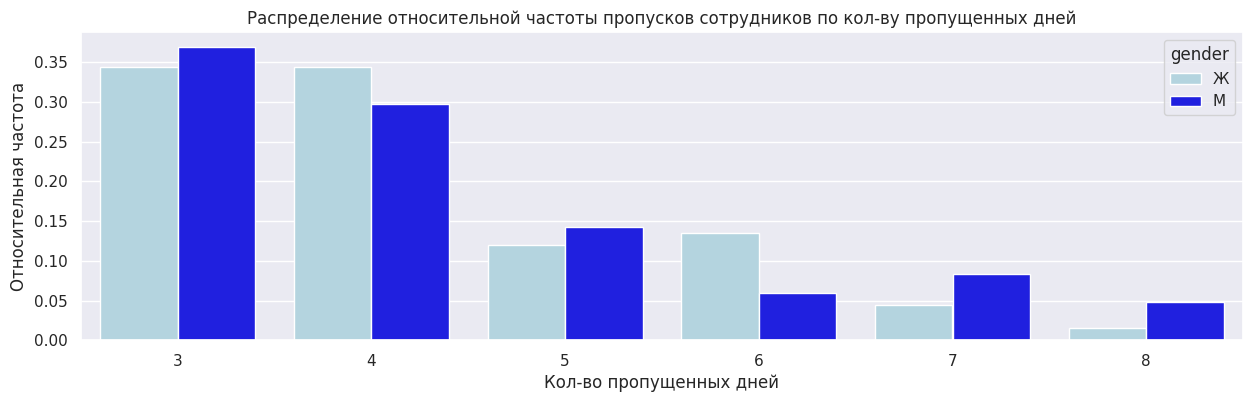

In [38]:
ax = sns.barplot(x='work_days',
            y='frequency',
            hue="gender",
            data=st_gender,
            palette=['lightblue', 'blue'])

ax.set_title('Распределение относительной частоты пропусков сотрудников по кол-ву пропущенных дней')
ax.set(xlabel='Кол-во пропущенных дней', ylabel='Относительная частота');

Можно наблюдать, что выборки в относительных единицах сохраняют свою форму перераспределения.

Выполним проверку гипотезы о равенстве средних двух генеральных совокупностей. 

Выделим следующие гипотезы:

```
H_0: Кол-во больничных дней мужчин пропустивших в течение года более 2 рабочих дней (work_days_1) по болезни  = Кол-во больничных дней женщин пропустивших в течение года более 2 рабочих дней (work_days_1) по болезни

H_a: Кол-во больничных дней мужчин пропустивших в течение года более 2 рабочих дней (work_days_1) по болезни  ≠  Кол-во больничных дней женщин пропустивших в течение года более 2 рабочих дней (work_days_1) по болезни

alpha_1 = 0.05
```

По заданию сказано, что мужчина сотрудник в компании болеет значимо чаще женщин.Таким образом среднее кол-во дней
Выделим выборки по мужчинам и женщинам.

In [39]:
st_male = df_work_days_1.loc[df_work_days_1['Пол'] == "М"]['Количество больничных дней']
st_female = df_work_days_1.loc[df_work_days_1['Пол']  == "Ж"]['Количество больничных дней']

In [40]:
alpha_1 = 0.05

results = st.ttest_ind(st_male, st_female, equal_var=False)

print("alpha для певого задания: ", alpha_1)
print("p-значение: ", results.pvalue)


if results.pvalue < alpha_1:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


alpha для певого задания:  0.05
p-значение:  0.6728666566797525
Не получилось отвергнуть нулевую гипотезу


Значит сотрудники мужчины также часто пропускают по причине болезни рабочие дни как и женщины.

**Задание 2** Проверка гипотезы: Работники старше 35 лет (age) пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще своих более молодых коллег.

Гипотезы:
```
H_0: Кол-во пропущенных дней сотрудниками старше 35 лет пропустивших в течение года более 2 рабочих дней  = Кол-во пропущенных дней сотрудниками  35 лет и младше пропустивших в течение года более 2 рабочих дней 
H_a: Кол-во пропущенных дней сотрудниками старше 35 лет пропустивших в течение года более 2 рабочих дней  ≠ Кол-во пропущенных дней сотрудниками  35 лет и младше пропустивших в течение года более 2 рабочих дней 

alpha_2 = 0.05

```

In [41]:
age = 35
work_days_2 = 2

Оставим в данных сотрудников пропустивших в течение года более 2 рабочих дней

In [42]:
df_work_days_2 = df[df['Количество больничных дней'] > work_days_2].reset_index(drop=True)

Создадим столбец с категоральным признаком, чтобы отличать сотрудника кто старше 35 лет и кто младше

In [43]:
for i in range(len(df_work_days_2)):
    if df_work_days_2.loc[i,'Возраст'] > age:
        df_work_days_2.loc[i,'Возрастная группа'] = 'old'
    else:
        df_work_days_2.loc[i,'Возрастная группа'] = 'young'

Посмотрим как распределен баланс классов по Возрастной группе

In [44]:
df_work_days_2.groupby('Возрастная группа').count().reset_index(col_level=True)

,Возрастная группа,Количество больничных дней,Возраст,Пол
0,old,115,115,115
1,young,36,36,36


Как можно наблюдать Возрастных сотрудникво намного больше. 

In [45]:
df_work_days_2 = df_work_days_2.drop(columns=['Возраст'])

Сгруппируем данные по Возрастной категории и кол-ву пропущенных дней и посчитаем сколько сотрудников пропустило

In [46]:
st_group_age = (
    df_work_days_2.pivot_table(
        index=[ "Возрастная группа","Количество больничных дней"],
        values=["Количество больничных дней"],
        aggfunc=["count"],
    )
    .round(2)
    .reset_index()
)

st_group_age.columns = [
    "group_age",
    "work_days",
    "work_days_count"
]

In [47]:
st_group_age

,group_age,work_days,work_days_count
0,old,3,44
1,old,4,34
2,old,5,15
3,old,6,12
4,old,7,7
5,old,8,3
6,young,3,10
7,young,4,14
8,young,5,5
9,young,6,2


Вычислим относительную частоту пропусков сотрудниками старшими и молодыми в каждой своей выборке. Посмотрим таким образом какое соотношение у данных.

In [48]:
st_group_age.loc[
    st_group_age["group_age"] == "old", "frequency"
] = (
    st_group_age.loc[
        st_group_age["group_age"] == "old", "work_days_count"
    ]
    / st_group_age[st_group_age["group_age"] == "old"]["work_days_count"].sum()
).round(
    4
)


In [49]:
st_group_age.loc[
    st_group_age["group_age"] == "young", "frequency"
] = (
    st_group_age.loc[
        st_group_age["group_age"] == "young", "work_days_count"
    ]
    / st_group_age[st_group_age["group_age"] == "young"]["work_days_count"].sum()
).round(
    4
)

In [50]:
st_group_age

,group_age,work_days,work_days_count,frequency
0,old,3,44,0.3826
1,old,4,34,0.2957
2,old,5,15,0.1304
3,old,6,12,0.1043
4,old,7,7,0.0609
5,old,8,3,0.0261
6,young,3,10,0.2778
7,young,4,14,0.3889
8,young,5,5,0.1389
9,young,6,2,0.0556


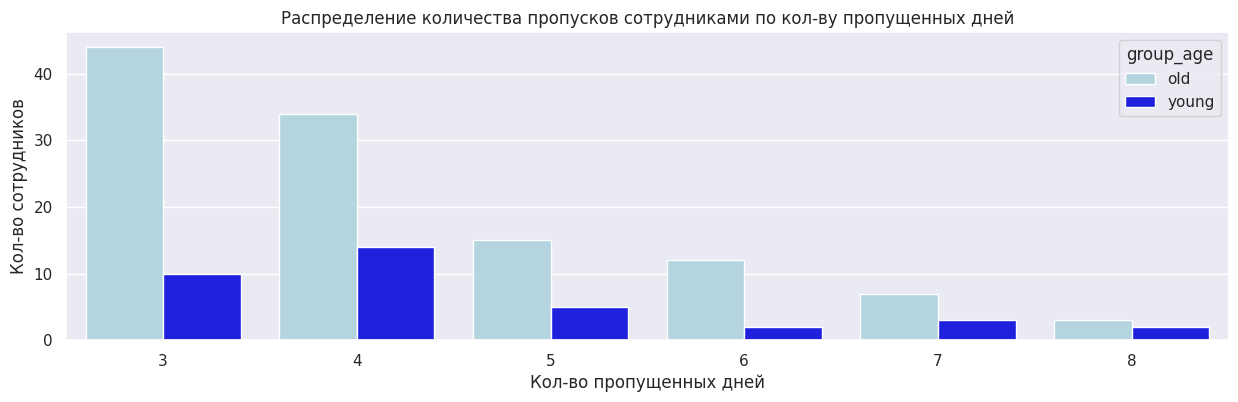

In [51]:
ax = sns.barplot(x='work_days',
            y='work_days_count',
            hue="group_age",
            data=st_group_age,
            palette=['lightblue', 'blue'])

ax.set_title('Распределение количества пропусков сотрудниками по кол-ву пропущенных дней')
ax.set(xlabel='Кол-во пропущенных дней', ylabel='Кол-во сотрудников');

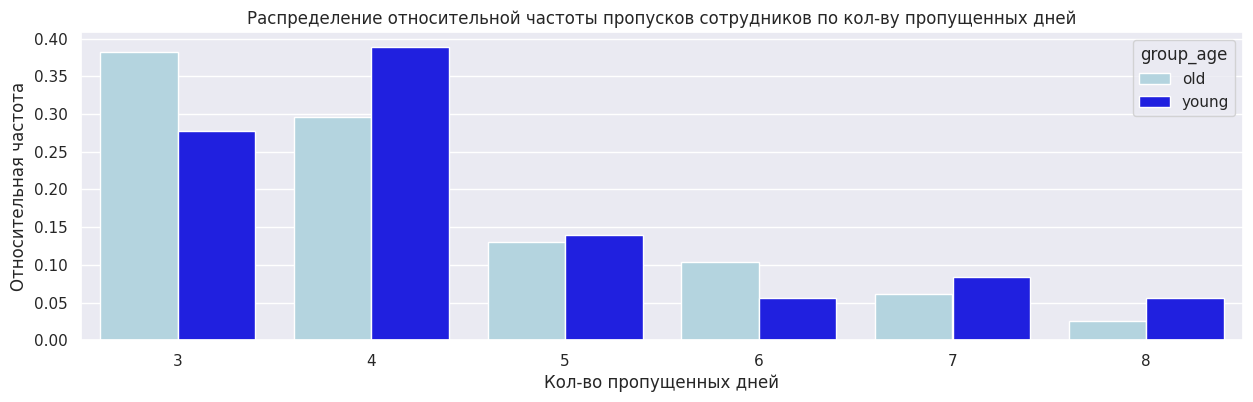

In [52]:
ax = sns.barplot(x='work_days',
            y='frequency',
            hue="group_age",
            data=st_group_age,
            palette=['lightblue', 'blue'])

ax.set_title('Распределение относительной частоты пропусков сотрудников по кол-ву пропущенных дней')
ax.set(xlabel='Кол-во пропущенных дней', ylabel='Относительная частота');

Как модно наблюдать. Не смотря на то что у нас большой дисбаланс классов по значениям. В относительном частотном соотношение данные между собой по форме распределения имеют не очень сильное отклонение.

Выделим две выборки

In [53]:
st_old = df_work_days_2.loc[df_work_days_2['Возрастная группа'] == "old"]['Количество больничных дней']
st_young = df_work_days_2.loc[df_work_days_2['Возрастная группа'] == "young"]['Количество больничных дней']

In [54]:
alpha_2 = 0.05

results = st.ttest_ind(
    st_old, 
    st_young,
    equal_var = False )

print('alpha: ', alpha_2)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha_2:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


alpha:  0.05
p-значение:  0.4677581873327753
Не получилось отвергнуть нулевую гипотезу


## Вывод

Было проведено исследоваие для по предоставленному набору данных. Руководство компании обратило внимание на то, что сотрудники старше 35 лет болеют чаще, чем более молодые сотрудники. Кроме этого, среди мужчин количество пропусков рабочих дней в связи с больничным выше, чем среди женщин. В связи с этой ситуацией, руководство организации планирует ввести дополнительные медицинские осмотры среди групп риска.

Для выполнения данного исследования были изучен предоставленный файл от руководства:
  - после предварительной обработки выяснилось, что данные имеют 237 строк и 3 столбца
  - Типы данных в столбцах "Количество больничных дней" и "Возраст" были переведены в целочисленный тип данных
  - пропуски отсуствуют
  - Максимальное кол-во дней, которые болел сотруник - 8, а минимальное - 0
  - Возраст сотрудников в диапазоне от 23 до 60 лет включительно

Затем был проведен исследовательский анализ данных в рамках которого выяснили, что данные распределены по нормальному закону. Присуствует небольшой дисбаланс классов по полу сотрудника. 

Также проверены следующие гипотезы:

1. Мужчины пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще женщин.\
гипотезы:

```
H_0: Кол-во больничных дней мужчин пропустивших в течение года более 2 рабочих дней (work_days_1) по болезни  = Кол-во больничных дней женщин пропустивших в течение года более 2 рабочих дней (work_days_1) по болезни

H_a: Кол-во больничных дней мужчин пропустивших в течение года более 2 рабочих дней (work_days_1) по болезни  ≠  Кол-во больничных дней женщин пропустивших в течение года более 2 рабочих дней (work_days_1) по болезни

alpha_1 = 0.05
```

Не получилось отвергнуть нулевую гипотезу

2. Работники старше 35 лет (age) пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще своих более молодых коллег.

Гипотезы:
```
H_0: Кол-во пропущенных дней сотрудниками старше 35 лет пропустивших в течение года более 2 рабочих дней  = Кол-во пропущенных дней сотрудниками  35 лет и младше пропустивших в течение года более 2 рабочих дней 
H_a: Кол-во пропущенных дней сотрудниками старше 35 лет пропустивших в течение года более 2 рабочих дней  ≠ Кол-во пропущенных дней сотрудниками  35 лет и младше пропустивших в течение года более 2 рабочих дней 

alpha_2 = 0.05

```

Не получилось отвергнуть нулевую гипотезу

Пороговое значение alpha=0.05